In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import all needed python libraries 
import pandas as ps
import numpy as np
import re
from scipy import stats
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
# Read the data from the local pc
cleangene_data=ps.read_csv("C:/Users/USER/Downloads/cleangene_data.csv") 

In [ ]:
# verify new dataframe 
cleangene_data

In [9]:

# This will extract the columns into control and autism for analysis 
control_columns = [col for col in cleangene_data.columns if 'Control' in col]
autism_columns = [col for col in cleangene_data.columns if 'Autism' in col]

# Compute summary statistics for Control condition
control_summary = cleangene_data[control_columns].describe()

# Compute summary statistics for Autism condition
autism_summary = cleangene_data[autism_columns].describe()


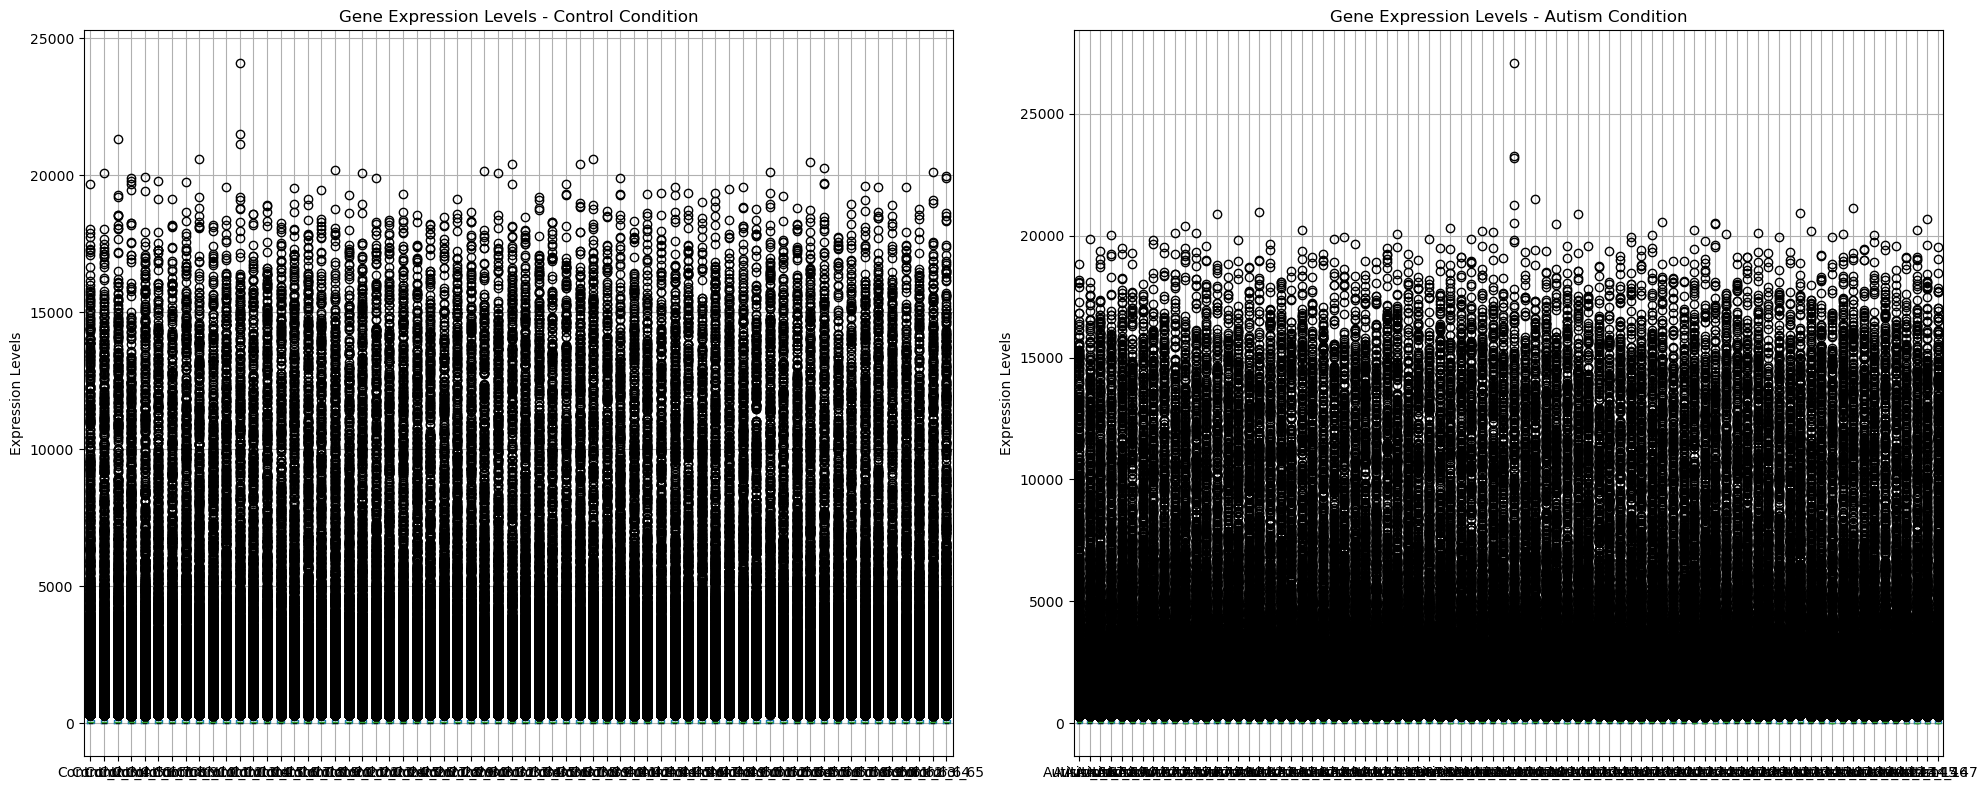

In [10]:
# Visualize the distribution of gene expression levels for Control and Autism conditions
plot.figure(figsize=(20, 8))

# Box plot for Control condition
plot.subplot(1, 2, 1)
cleangene_data[control_columns].boxplot()
plot.title('Gene Expression Levels - Control Condition')
plot.ylabel('Expression Levels')

# Box plot for Autism condition
plot.subplot(1, 2, 2)
cleangene_data[autism_columns].boxplot()
plot.title('Gene Expression Levels - Autism Condition')
plot.ylabel('Expression Levels')

plot.tight_layout()
plot.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_16004\2736238129.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plot.tight_layout()


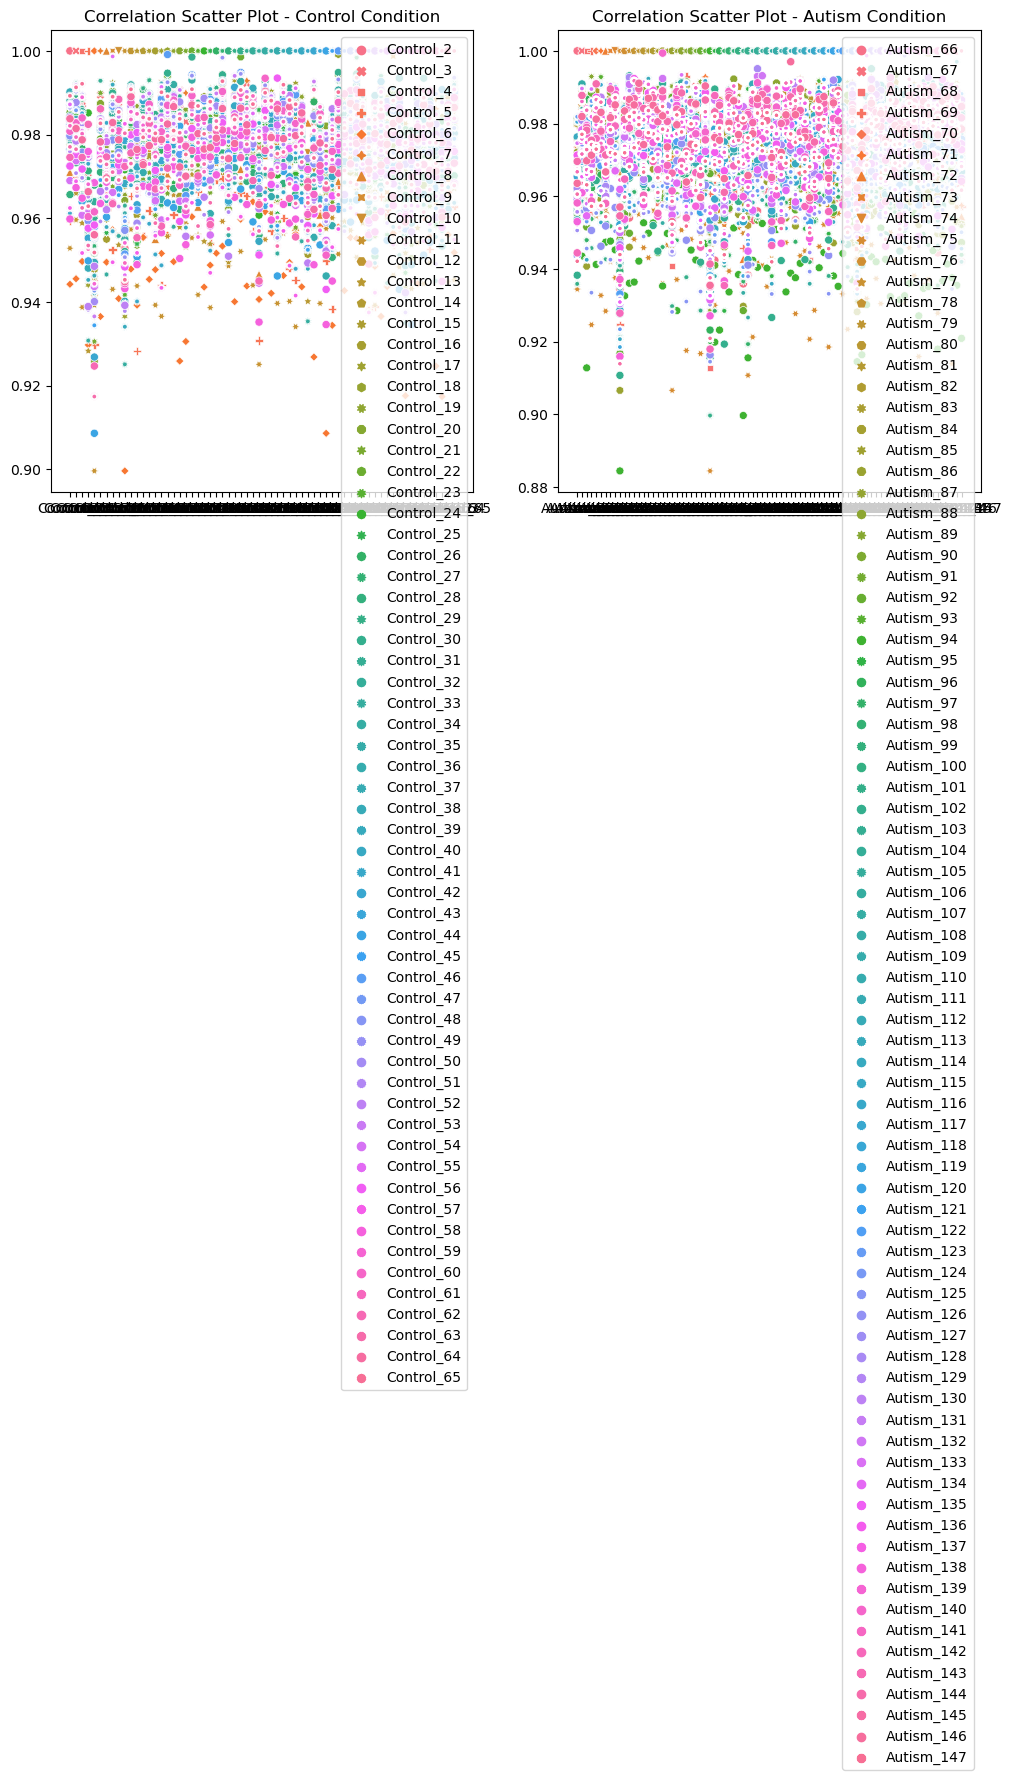

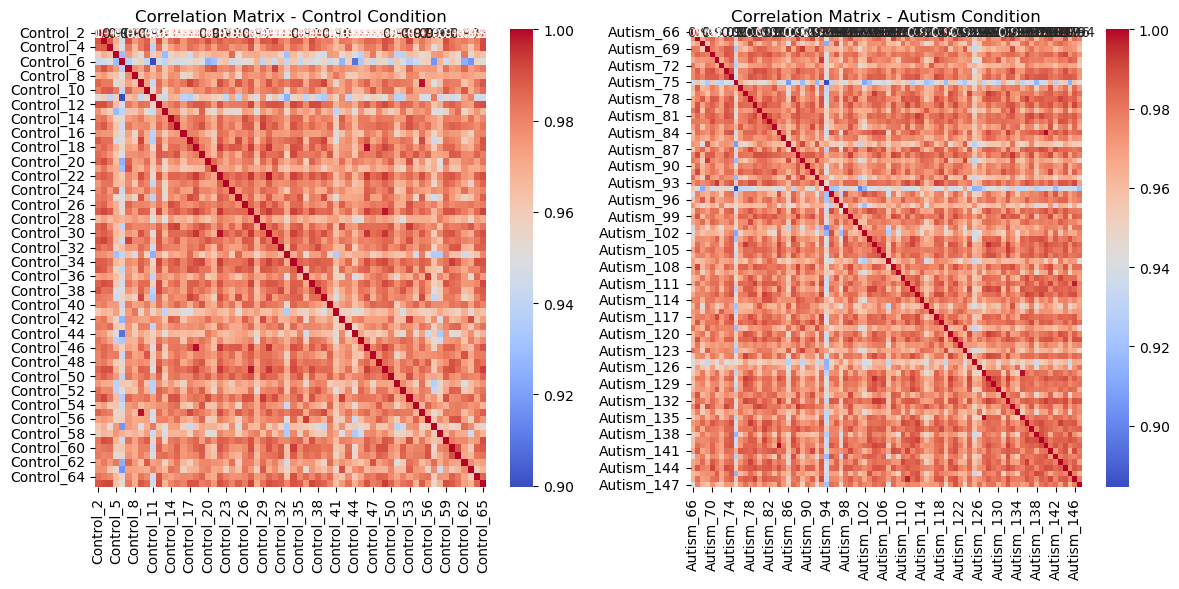

In [11]:
# Extract Control and Autism columns
control_columns = [col for col in cleangene_data.columns if 'Control' in col]
autism_columns = [col for col in cleangene_data.columns if 'Autism' in col]

# Compute correlation matrix for Control condition
control_corr = cleangene_data[control_columns].corr()

# Compute correlation matrix for Autism condition
autism_corr = cleangene_data[autism_columns].corr()

# Visualize correlations using scatter plots
plot.figure(figsize=(12, 6))

# Scatter plot for Control condition
plot.subplot(1, 2, 1)
sns.scatterplot(data=cleangene_data[control_columns].corr())
plot.title('Correlation Scatter Plot - Control Condition')

# Scatter plot for Autism condition
plot.subplot(1, 2, 2)
sns.scatterplot(data=cleangene_data[autism_columns].corr())
plot.title('Correlation Scatter Plot - Autism Condition')

plot.tight_layout()
plot.show()

# Visualize correlation matrices
plot.figure(figsize=(12, 6))

# Heatmap for Control condition
plot.subplot(1, 2, 1)
sns.heatmap(control_corr, annot=True, cmap='coolwarm')
plot.title('Correlation Matrix - Control Condition')

# Heatmap for Autism condition
plot.subplot(1, 2, 2)
sns.heatmap(autism_corr, annot=True, cmap='coolwarm')
plot.title('Correlation Matrix - Autism Condition')

plot.tight_layout()
plot.show()

In [12]:
# Step 1: Prepare the Data
X = cleangene_data.drop(columns='gene_symbol')  # Features (gene expression values)
y = cleangene_data['gene_symbol']  # Target variable (gene symbols)

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implementing random forest classification 

In [13]:
# 1. Check for outliers using Z-score
z_scores = np.abs(stats.zscore(X_train))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

In [14]:

# 2. Remove outliers
X_train = np.delete(X_train, outlier_indices[0], axis=0)
y_train = np.delete(y_train, outlier_indices[0])



In [ ]:
# 3. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# 4. Standardize the normalized data
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train_normalized)
X_test_standardized = standard_scaler.transform(X_test_normalized)

In [ ]:
X_train_standardized

In [16]:
#X_train_standardized, X_test_standardized, y_train, y_test

In [ ]:


# Initialize classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train classifiers
random_forest.fit(X_train_standardized, y_train)
svm.fit(X_train_standardized, y_train)
gradient_boosting.fit(X_train_standardized, y_train)

# Predictions
rf_predictions = random_forest.predict(X_test_standardized)
svm_predictions = svm.predict(X_test_standardized)
gb_predictions = gradient_boosting.predict(X_test_standardized)

# Compute confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

# Calculate sensitivity and specificity
def calculate_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

rf_sensitivity, rf_specificity = calculate_metrics(rf_conf_matrix)
svm_sensitivity, svm_specificity = calculate_metrics(svm_conf_matrix)
gb_sensitivity, gb_specificity = calculate_metrics(gb_conf_matrix)

In [ ]:
#Printing out the confusion matrix accuracy , the sensitivity and the specificity

In [ ]:
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest Sensitivity:", rf_sensitivity)
print("Random Forest Specificity:", rf_specificity)

print("\nSupport Vector Machine Confusion Matrix:")
print(svm_conf_matrix)
print("Support Vector Machine Sensitivity:", svm_sensitivity)
print("Support Vector Machine Specificity:", svm_specificity)

print("\nGradient Boosting Confusion Matrix:")
print(gb_conf_matrix)
print("Gradient Boosting Sensitivity:", gb_sensitivity)
print("Gradient Boosting Specificity:", gb_specificity)